# ST1504 Deep Learning CA1: CIFAR-10 Dataset

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# from livelossplot import PlotLossesKeras
# import tfwatcher


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Change style of matplotlib
plt.style.use('seaborn')

# Tensorflow statistics
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.7.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## EDA

In [2]:
# Load Cifar10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Get shape of Data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## CIFAR-10 Dataset
The CIFAR-10 Dataset contains 60000 32x32 colour images in 10 classes, with 6000 images per class.

In [4]:
# create array of labels

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# see the first value of X_train
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Get value of y_train
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# flatten the 2D y_train array to 1D
y_train = y_train.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

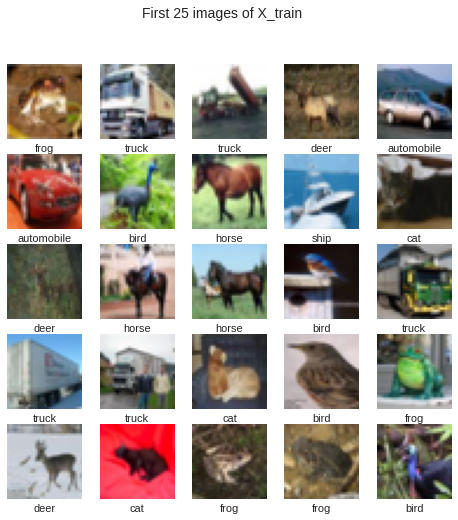

In [8]:
# Show first 4 images
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.suptitle("First 25 images of X_train", fontsize=14)
plt.show()

## Data Augmentation


In [21]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
dataGen.fit(X_train)

In [10]:
# normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
# one-hot encode target column
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
# define callbacks for early stopping and model checkpointing
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', patience=5),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='cifar10_model.h5',
        monitor='accuracy', save_best_only=True)
]


In [16]:
def plotLossAccGraph(result):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(result.history['loss'], label='Training Loss')
    ax1.plot(result.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    # ax1.set_ylim(bottom=0.0, top=0.6)
    ax1.legend()

    ax2.plot(result.history['accuracy'], label='Training Accuracy')
    ax2.plot(result.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    # ax2.set_ylim(bottom=0.85, top=1.0)
    ax2.legend()

    plt.show()


## CNN Model

In [ ]:
# CNN Model

cnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (2, 2), strides=1,activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
 
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),



    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                    metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                        

## CNN with dataGen

Epoch 1/100
49/49 [==============================] - 19s 395ms/step - loss: 1.2490 - accuracy: 0.5526 - val_loss: 4.5194 - val_accuracy: 0.1000
Epoch 2/100
49/49 [==============================] - 19s 396ms/step - loss: 1.1519 - accuracy: 0.5888 - val_loss: 6.7006 - val_accuracy: 0.1000
Epoch 3/100
49/49 [==============================] - 19s 394ms/step - loss: 1.0865 - accuracy: 0.6129 - val_loss: 5.7880 - val_accuracy: 0.1000
Epoch 4/100
49/49 [==============================] - 20s 398ms/step - loss: 1.0387 - accuracy: 0.6317 - val_loss: 6.0900 - val_accuracy: 0.1000
Epoch 5/100
49/49 [==============================] - 19s 395ms/step - loss: 0.9887 - accuracy: 0.6506 - val_loss: 7.4175 - val_accuracy: 0.1000
Epoch 6/100
49/49 [==============================] - 19s 396ms/step - loss: 0.9526 - accuracy: 0.6608 - val_loss: 8.5241 - val_accuracy: 0.1001
Epoch 7/100
49/49 [==============================] - 19s 397ms/step - loss: 0.9229 - accuracy: 0.6730 - val_loss: 6.7778 - val_accuracy:

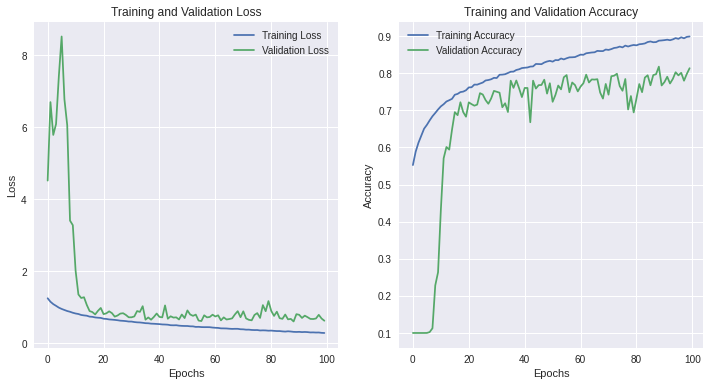

In [ ]:
cnn_gen_result = cnn_model.fit(dataGen.flow(X_train, y_train, batch_size=1024), epochs=150, validation_data=(X_test, y_test), callbacks=[])
plotLossAccGraph(cnn_gen_result)

In [ ]:
# 2nd Model

model2 = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(128, (2, 2), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (2, 2), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
 
    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model2.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                    metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       1664      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       65664     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       131328    
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)      

Epoch 1/150
49/49 [==============================] - 38s 641ms/step - loss: 9.1611 - accuracy: 0.1608 - val_loss: 8.6701 - val_accuracy: 0.1288
Epoch 2/150
49/49 [==============================] - 25s 512ms/step - loss: 2.0383 - accuracy: 0.2292 - val_loss: 3.7961 - val_accuracy: 0.1116
Epoch 3/150
49/49 [==============================] - 25s 512ms/step - loss: 1.9468 - accuracy: 0.2601 - val_loss: 2.5260 - val_accuracy: 0.1494
Epoch 4/150
49/49 [==============================] - 25s 511ms/step - loss: 1.8843 - accuracy: 0.2775 - val_loss: 2.6428 - val_accuracy: 0.1034
Epoch 5/150
49/49 [==============================] - 25s 511ms/step - loss: 1.8580 - accuracy: 0.2873 - val_loss: 2.6838 - val_accuracy: 0.1427
Epoch 6/150
49/49 [==============================] - 25s 512ms/step - loss: 1.8319 - accuracy: 0.2991 - val_loss: 2.4454 - val_accuracy: 0.1475
Epoch 7/150
49/49 [==============================] - 25s 512ms/step - loss: 1.8071 - accuracy: 0.3073 - val_loss: 2.5536 - val_accuracy:

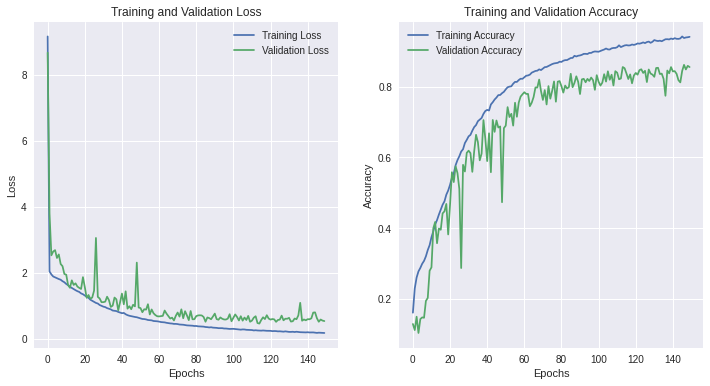

In [ ]:
model2_result = model2.fit(dataGen.flow(X_train, y_train, batch_size=1024), epochs=150, validation_data=(X_test, y_test))
plotLossAccGraph(model2_result)

In [25]:
model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3,3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv2D(1024, (2, 2), strides=1, activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 10, 10, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_47 (Conv2D)          (None, 10, 10, 128)      

In [33]:
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=5,
    min_lr=0,
)

In [26]:
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1024).prefetch(tf.data.AUTOTUNE)
model3_result = model3.fit(
    dataGen.flow(X_train, y_train, batch_size=1024), 
    epochs=150, 
    validation_data=val_data, 
    callbacks=[reduceLR]
    )

Epoch 1/150
49/49 [==============================] - 28s 546ms/step - loss: 2.2166 - accuracy: 0.2192 - val_loss: 2.3631 - val_accuracy: 0.1155 - lr: 0.0010
Epoch 2/150
49/49 [==============================] - 25s 513ms/step - loss: 1.7384 - accuracy: 0.3321 - val_loss: 2.9377 - val_accuracy: 0.1026 - lr: 0.0010
Epoch 3/150
49/49 [==============================] - 25s 503ms/step - loss: 1.5540 - accuracy: 0.4212 - val_loss: 4.4733 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 4/150
49/49 [==============================] - 25s 509ms/step - loss: 1.4104 - accuracy: 0.4868 - val_loss: 4.8504 - val_accuracy: 0.1106 - lr: 0.0010
Epoch 5/150
49/49 [==============================] - 25s 515ms/step - loss: 1.2253 - accuracy: 0.5536 - val_loss: 5.3626 - val_accuracy: 0.1252 - lr: 1.0000e-04
Epoch 6/150
49/49 [==============================] - 25s 514ms/step - loss: 1.1640 - accuracy: 0.5767 - val_loss: 4.5870 - val_accuracy: 0.1497 - lr: 1.0000e-04
Epoch 7/150
49/49 [==============================]

KeyboardInterrupt: ignored

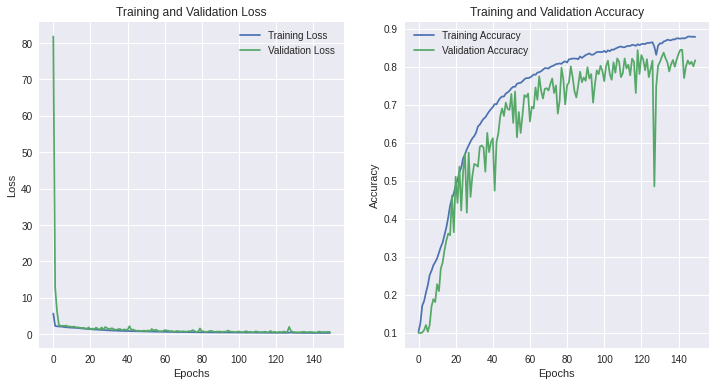

In [22]:
plotLossAccGraph(model3_result)

In [41]:
model4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model4.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model4.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 conv2d_126 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_45 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_127 (Conv2D)         (None, 16, 16, 128)       73856     
                                                                 
 conv2d_128 (Conv2D)         (None, 16, 16, 128)     

In [50]:
X_train.shape

(50000, 32, 32, 3)

Epoch 1/150
49/49 [==============================] - 28s 544ms/step - loss: 2.2623 - accuracy: 0.1791 - val_loss: 3.9460 - val_accuracy: 0.1070
Epoch 2/150
49/49 [==============================] - 27s 540ms/step - loss: 1.8810 - accuracy: 0.2654 - val_loss: 2.3582 - val_accuracy: 0.1282
Epoch 3/150
49/49 [==============================] - 27s 541ms/step - loss: 1.7572 - accuracy: 0.3144 - val_loss: 2.5413 - val_accuracy: 0.1169
Epoch 4/150
49/49 [==============================] - 27s 544ms/step - loss: 1.6714 - accuracy: 0.3532 - val_loss: 3.0263 - val_accuracy: 0.1000
Epoch 5/150
49/49 [==============================] - 27s 539ms/step - loss: 1.5995 - accuracy: 0.3884 - val_loss: 5.1073 - val_accuracy: 0.1000
Epoch 6/150
49/49 [==============================] - 27s 538ms/step - loss: 1.4509 - accuracy: 0.4521 - val_loss: 6.4468 - val_accuracy: 0.1000
Epoch 7/150
49/49 [==============================] - 26s 535ms/step - loss: 1.3232 - accuracy: 0.5083 - val_loss: 9.2164 - val_accuracy:

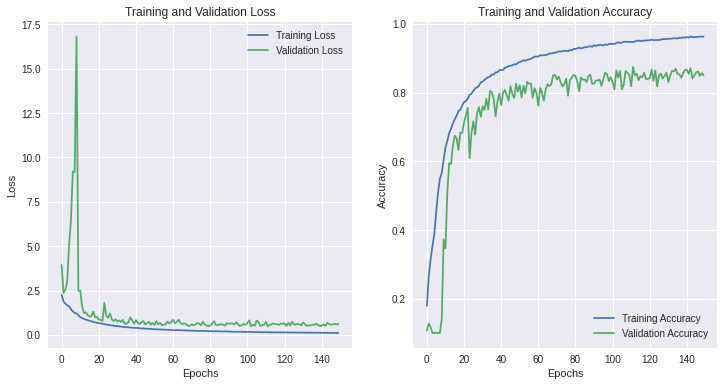

In [42]:
model4_result = model4.fit(
    dataGen.flow(X_train, y_train, batch_size=1024), 
    epochs=150, 
    validation_data=tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1024).prefetch(tf.data.AUTOTUNE), 
    # callbacks=[reduceLR]
    )
plotLossAccGraph(model4_result)

In [26]:
reduceLR2 = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=5,
    min_lr=0,
)

In [27]:
model5 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    # tf.keras.layers.Conv2D(1024, (3, 3), strides=1,activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

Epoch 1/150
49/49 [==============================] - 21s 317ms/step - loss: 2.1405 - accuracy: 0.3027 - val_loss: 2.6758 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/150
49/49 [==============================] - 19s 281ms/step - loss: 1.4567 - accuracy: 0.4653 - val_loss: 4.0030 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/150
49/49 [==============================] - 20s 293ms/step - loss: 1.2301 - accuracy: 0.5556 - val_loss: 5.3082 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/150
49/49 [==============================] - 20s 285ms/step - loss: 1.0966 - accuracy: 0.6121 - val_loss: 6.7969 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 5/150
49/49 [==============================] - 19s 283ms/step - loss: 0.9715 - accuracy: 0.6521 - val_loss: 7.5505 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 6/150
49/49 [==============================] - 18s 282ms/step - loss: 0.8423 - accuracy: 0.7034 - val_loss: 7.5999 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 7/150
49/49 [==============================] - 17s 2

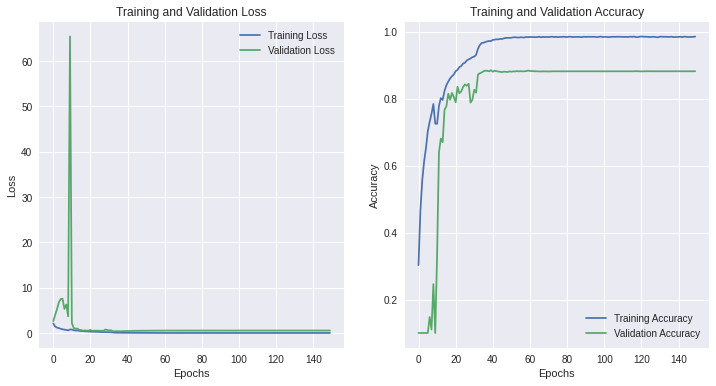

In [28]:
model5_result = model5.fit(
    dataGen.flow(X_train, y_train, batch_size=1024), 
    epochs=150, 
    validation_data=tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1024).prefetch(tf.data.AUTOTUNE), 
    callbacks=[reduceLR2],
    use_multiprocessing=True,
    workers=32
    )
plotLossAccGraph(model5_result)

In [30]:
model5.save('bestModel.h5')

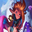

In [ ]:
  # import image
from PIL import Image
img = Image.open('download.jfif')
img = img.resize((32, 32), Image.ANTIALIAS)
img

In [ ]:
# Convert image to numpy array
imgArr = np.array(img)
imgArr.shape

(32, 32, 3)

In [ ]:
# normalize image
imgArr = imgArr / 255.0

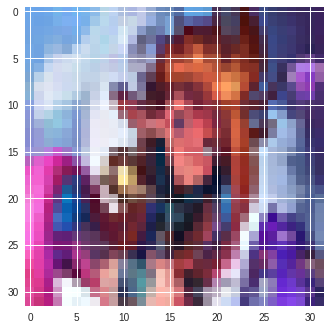

In [ ]:
plt.imshow(imgArr)

In [ ]:
imgArr.shape

(32, 32, 3)

In [ ]:
imgArr = imgArr.reshape(1, 32, 32, 3)

In [ ]:
result = cnn_model.predict(imgArr)
print(np.argmax(result))
print("Predicted:",labels[np.argmax(result)])


5
Predicted: dog
